<a href="https://colab.research.google.com/github/Maria-Ul/Advanced-ML/blob/main/Module_10_individual_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В данном упражнении вам предстоит решить уже знакомую задачу классификации изображений – отделить изображения кошек от изображений собак, используя ансамбль моделей на основе стекинга.

Данная выборка используется для обучения классификатора и его оценки.

In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade scikit-learn==0.23.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


При считывании набора данных (картинок) из папки для построения гистограммы отсортируйте названия по алфавиту, например, так (иначе тренировочные наборы данных могут отличаться даже при фиксированном random_seed):

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [ ]:
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import imutils.paths as paths
from google.colab.patches import cv2_imshow

In [ ]:
def loadTrainingImages1(PATH):
    images = []
    hist =[]
    imagePaths = sorted(list(paths.list_images(PATH)))
    for i in range(len(imagePaths)):
        img = cv2.imread(imagePaths[i])
        #img = img_to_array(img)
        hist.append(extract_histogram(img))
        images.append(img)

    y = np.zeros(len(imagePaths))

    for i in range(len(y)):
      if 'cat' in imagePaths[i].lower():
        y[i] = int(1)
      if 'dog' in imagePaths[i].lower():
        y[i] = int(0)


    return images, y, hist, imagePaths

In [ ]:
def extract_histogram(image, bins=(8, 8, 8)):
  hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
  cv2.normalize(hist, hist)
  return hist.flatten()

In [ ]:
images , y, X, imagePaths = loadTrainingImages1(PATH = "/content/drive/MyDrive/train")


1. Обучите базовые алгоритмы на исходном наборе данных (предварительно закодируйте классы: Cat — 1, Dog — 0):



Классификатор с мягким зазором и параметрами: C = 1.09, random_state = 462, остальные параметры по умолчанию;


In [ ]:
clf_linear = LinearSVC(C = 1.09, random_state = 462)

In [ ]:
clf_linear.fit(X,y)

LinearSVC(C=1.09, random_state=462)

Бэггинг деревьев принятия решений. Параметры дерева: criterion = 'entropy', min_samples_leaf = 10, max_leaf_nodes = 20, random_state = 462, остальные параметры по умолчанию. Параметры бэггинга: n_estimators = 19, random_state = 462;

In [ ]:
des_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 10, max_leaf_nodes = 20, random_state = 462)

In [ ]:
clf_bagg = BaggingClassifier( base_estimator = des_tree , n_estimators = 19, random_state = 462)

In [ ]:
clf_bagg.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_leaf_nodes=20,
                                                        min_samples_leaf=10,
                                                        random_state=462),
                  n_estimators=19, random_state=462)

Случайный лес с параметрами: n_estimators = 19, criterion = 'entropy', min_samples_leaf = 10, max_leaf_nodes = 20, random_state = 462, остальные параметры по умолчанию.


In [ ]:
clf_rdm_frst = RandomForestClassifier(n_estimators = 19, criterion = 'entropy', min_samples_leaf = 10, max_leaf_nodes = 20, random_state = 462)

In [ ]:
clf_rdm_frst.fit(X,y)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=20,
                       min_samples_leaf=10, n_estimators=19, random_state=462)

2. Обучите метаалгоритм — логистическая регрессия: solver='lbfgs', random_state = 462, остальные параметры по умолчанию.

In [ ]:
clf_log_reg = LogisticRegression(solver='lbfgs', random_state = 462)

In [ ]:
clf_log_reg.fit(X,y)

LogisticRegression(random_state=462)

Оцените его точность при cv = 2.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV


In [ ]:
clf_log_reg_cv2 = LogisticRegressionCV(cv=2, solver='lbfgs', random_state = 462).fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter[i] = n_iter_i
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter[i] = n_iter_i
/usr/loc

In [ ]:
images_test , y_test, X_test, imagePaths_test = loadTrainingImages1(PATH = "/content/drive/MyDrive/test")


In [ ]:
y_test[0]

0.0

In [ ]:
imagePaths_test[0]

'/content/drive/MyDrive/test/cat.1000.jpg'

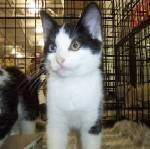

In [ ]:
cv2_imshow(images_test[0])

In [ ]:
clf_log_reg_cv2.score(X_test, y_test)

0.54

3. Обучите модель стэкинга. Используйте 2-fold (cv = 2) кросс-валидацию для оценки.



In [ ]:
# clf_stack = StackingClassifier(estimators = [('rf',clf_rdm_frst),
#                                              ('linear',clf_linear),
#                                              ('bag',clf_bagg)
#                                              ], final_estimator= clf_log_reg,
#                                 cv = 2)

In [ ]:
# clf_stack.fit(X,y)

StackingClassifier(cv=2,
                   estimators=[('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_leaf_nodes=20,
                                                       min_samples_leaf=10,
                                                       n_estimators=19,
                                                       random_state=462)),
                               ('linear', LinearSVC(C=1.09, random_state=462)),
                               ('bag',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                        max_leaf_nodes=20,
                                                                                        min_samples_leaf=10,
                                                                                        random_state=462),
             

In [ ]:
estimators = [("svm", svm),
              ("bc", bc),
              ("rf", rfc)]

clf = StackingClassifier(estimators=estimators, final_estimator=lr, cv=2)
clf.fit(X, y)

clf.score(X, y)

Введите долю правильной классификации (Accuracy):

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score


In [ ]:
y_pred = clf_stack.predict(X)


In [ ]:
accuracy_score(y, y_pred)

0.839

Определите вероятность отнесения изображений к классу 1 с помощью обученного метаалгоритма. Ответы округлите до тысячных.



In [ ]:
y_proba = clf_stack.predict_proba(X_test)
y_pred = clf_stack.predict(X_test)


In [ ]:
y_proba[0]

array([0.6249701, 0.3750299])

In [ ]:
y_pred[0]

0.0

In [ ]:
'cat.1004' in imagePaths_test[4].lower()

True

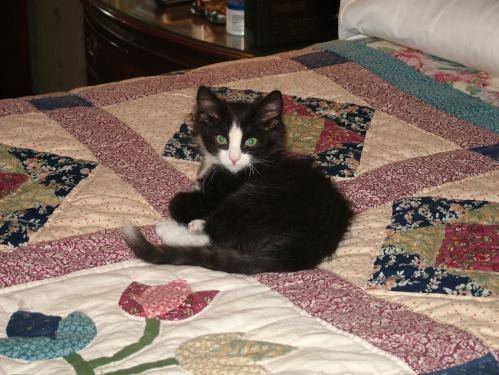

/content/drive/MyDrive/test/cat.1004.jpg
0.584


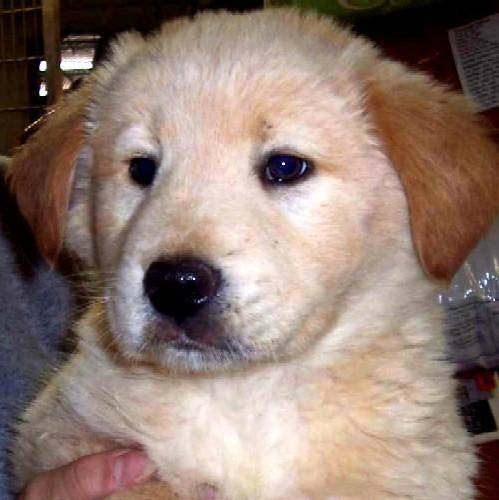

/content/drive/MyDrive/test/dog.1006.jpg
0.624


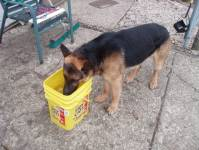

/content/drive/MyDrive/test/dog.1023.jpg
0.649


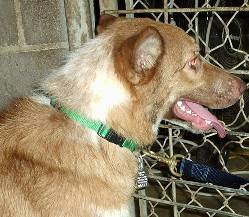

/content/drive/MyDrive/test/dog.1029.jpg
0.728


In [ ]:
for i in range(len(imagePaths_test)):
  name = imagePaths_test[i]
  if 'dog.1023' in name.lower():
    cv2_imshow(images_test[i])
    print(imagePaths_test[i])
    print(round(y_proba[i][1],3))
  if 'dog.1029' in name.lower():
    cv2_imshow(images_test[i])
    print(imagePaths_test[i])
    print(round(y_proba[i][1],3))
  if 'dog.1006' in name.lower():
    cv2_imshow(images_test[i])
    print(imagePaths_test[i])
    print(round(y_proba[i][1],3))
  if 'cat.1004' in name.lower():
    cv2_imshow(images_test[i])
    print(imagePaths_test[i])
    print(round(y_proba[i][1],3))
